In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 




train_df = pd.read_csv('mask-total.csv', sep=',')
train_df.head()

,colct_stdde,sle_site_domn,prices_prdlst_id,goods_nm,shop_nm,anals_trget_pc,Price,expsr_ordr,job_id,kf,Rand
0,2020-05-25,search.shopping.naver.com,F012050,끈조절 가능 뉴네퓨어 황사방역 마스크 KF94 대형 소형 마스크 - 내니클린,내니클린,2900,2900.0,10.0,490001,94,0.000070
1,2020-05-12,search.shopping.naver.com,F012050,건영크린텍 10매건영 KF94 미세먼지 마스크 대형 white 5매입2 - G마켓,G마켓,29000,2900.0,80.0,490015,94,0.000081
2,2020-05-28,search.shopping.naver.com,F012050,[네퓨어] 파인텍 네퓨어 KF94 대형(5매입x1개) 황사 미세먼지 끈조절 마스크 ...,위메프,13000,2600.0,37.0,490008,94,0.000090
3,2020-04-17,search.shopping.naver.com,F012050,국산 kf80 마스크 대형 - 도그몰,도그몰,3000,3000.0,29.0,490013,80,0.000103
4,2020-03-28,search.shopping.naver.com,F012050,KF94 마스크 5매 대형/소형/성인/어린이 쉐도우 문 미세먼지 마스크 제로베이 도...,폴보스티몰,19500,3900.0,21.0,490001,94,0.000310


In [2]:
train_df=train_df.loc[:,['goods_nm','kf']]
train_df.head()

,goods_nm,kf
0,끈조절 가능 뉴네퓨어 황사방역 마스크 KF94 대형 소형 마스크 - 내니클린,94
1,건영크린텍 10매건영 KF94 미세먼지 마스크 대형 white 5매입2 - G마켓,94
2,[네퓨어] 파인텍 네퓨어 KF94 대형(5매입x1개) 황사 미세먼지 끈조절 마스크 ...,94
3,국산 kf80 마스크 대형 - 도그몰,80
4,KF94 마스크 5매 대형/소형/성인/어린이 쉐도우 문 미세먼지 마스크 제로베이 도...,94


In [3]:
train_data,test_data=train_test_split(train_df,random_state=100)

In [4]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12054 entries, 5166 to 5640
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   goods_nm  12054 non-null  object
 1   kf        12054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 282.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4019 entries, 10036 to 13413
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   goods_nm  4019 non-null   object
 1   kf        4019 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 94.2+ KB


In [5]:
train_data['goods_nm'].nunique(), train_data['kf'].nunique()

(2129, 3)

In [6]:
train_data.drop_duplicates(subset=['goods_nm'], inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 2129


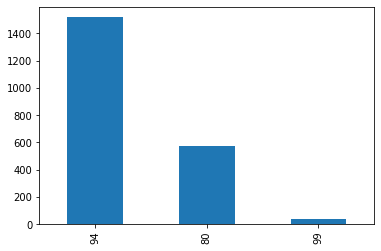

In [8]:
train_data['kf'].value_counts().plot(kind = 'bar')

In [9]:
print(train_data.groupby('kf').size().reset_index(name = 'count'))

   kf  count
0  80    573
1  94   1521
2  99     35


In [10]:
test_data.drop_duplicates(subset=['goods_nm'], inplace=True) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


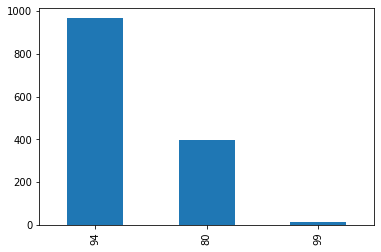

In [11]:
test_data['kf'].value_counts().plot(kind = 'bar')

In [12]:
print('총 샘플의 수 :',len(test_data))

총 샘플의 수 : 1383


In [13]:
print(train_data.isnull().values.any())

False


In [21]:
import numpy as np

train_data['goods_nm'] = train_data['goods_nm'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]
test_data.drop_duplicates(subset = ['goods_nm'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['goods_nm'] = test_data['goods_nm'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['goods_nm'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 1320


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [23]:
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
okt=Okt()
X_train = []
for sentence in train_data['goods_nm']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [25]:
print(X_train[:3])

[['웰', '클린', '황사', '방역', '마스크', '매', '성', '인대', '형', '일회용', '마켓'], ['스마일', '황사', '미세먼지', '마스크', '개', '블랙', '블랙', '화이트', '롯데'], ['쉼표', '리빙', '황사', '방역', '마스크', '그레이', '대형', '팩', '매', '쿠팡']]


In [26]:
X_test = []
for sentence in test_data['goods_nm']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [27]:
print(X_test[:3])

[['당일', '출고', '코지', '마스크', '대형', '매입', '블랙', '마켓'], ['오픈', '프리', '흰색', '대형', '마스크', '매', '마켓'], ['대형', '마스크', '개', '매', '개', '총', '매입', '바이러스', '황사', '미세먼지', '동백꽃', '상회']]


In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [29]:
print(tokenizer.word_index)

{'마스크': 1, '대형': 2, '황사': 3, '개': 4, '미세먼지': 5, '매': 6, '방역': 7, '포장': 8, '매입': 9, '개별': 10, '마켓': 11, '일회용': 12, '소형': 13, '화이트': 14, '국내': 15, '번가': 16, '용': 17, '당일': 18, '국산': 19, '퓨어': 20, '코로나': 21, '쿠팡': 22, '네': 23, '옥션': 24, '발송': 25, '위메프': 26, '성': 27, '인용': 28, '어린이': 29, '블랙': 30, '개입': 31, '가드': 32, '티몬': 33, '식약처': 34, '생산': 35, '몰다': 36, '랜덤': 37, '출고': 38, '황': 39, '뉴': 40, '웰킵스': 41, '푸른': 42, '인증': 43, '대': 44, '사방': 45, '역용': 46, '차단': 47, '흰색': 48, '중형': 49, '닥터': 50, '크다': 51, '퓨리': 52, '크리넥스': 53, '인터파크': 54, '형': 55, '먼지': 56, '필터': 57, '숨': 58, '배송': 59, '초미세먼지': 60, '조': 61, '애니': 62, '더': 63, '건강': 64, '케어': 65, '방한': 66, '더스논': 67, '늘': 68, '보건': 69, '중': 70, '조절': 71, '끈': 72, '파다': 73, '플러스': 74, '파인텍': 75, '미세': 76, '프리': 77, '산': 78, '재고': 79, '동아제약': 80, '스토어': 81, '아': 82, '샵': 83, '입체': 84, '회용': 85, '예방': 86, '면': 87, '우한': 88, '생활': 89, '낱개': 90, '성인': 91, '허가': 92, '도매': 93, '인': 94, '의약외품': 95, '유한킴벌리': 96, '데이': 97, '린': 98, '원': 99, '애경': 100, '

In [30]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 1462
등장 빈도가 2번 이하인 희귀 단어의 수: 794
단어 집합에서 희귀 단어의 비율: 54.309165526675784
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.422583404619332


In [31]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 669


In [32]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [33]:
print(X_train[:3])

[[112, 158, 3, 7, 1, 6, 27, 549, 55, 12, 11], [3, 5, 1, 4, 30, 30, 14, 101], [150, 115, 3, 7, 1, 178, 2, 113, 6, 22]]


In [34]:
y_train = np.array(train_data['kf'])
y_test = np.array(test_data['kf'])

In [35]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [36]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

2129
2129


In [37]:
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

1320
1320


상품명의 최대 길이 : 34
상품명 평균 길이 : 10.496007515265383


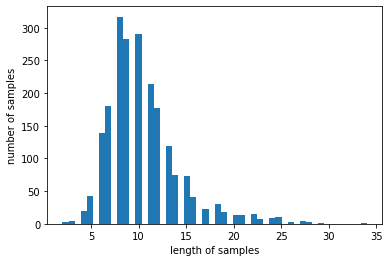

In [38]:
print('상품명의 최대 길이 :',max(len(l) for l in X_train))
print('상품명 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [46]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 100.0


In [47]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [48]:
yy_train=[]
yy_test=[]

for i in range(len(y_train)):
    if y_train[i]==99:
        yy_train.append([0,0,1])
    elif y_train[i]==94:
        yy_train.append([0,1,0])
    elif y_train[i]==80:
        yy_train.append([1,0,0])
        
for i in range(len(y_test)):
    if y_test[i]==99:
        yy_test.append([0,0,1])
    elif y_test[i]==94:
        yy_test.append([0,1,0])
    elif y_test[i]==80:
        yy_test.append([1,0,0])
        
yy_train=np.array(yy_train)
yy_test=np.array(yy_test)
        

In [49]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [50]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='sigmoid'))

In [51]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [52]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, yy_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.1)

Train on 1916 samples, validate on 213 samples
Epoch 1/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.7067 - acc: 0.6978
Epoch 00001: val_acc improved from -inf to 0.70892, saving model to best_model.h5
1916/1916 [==============================] - 4s 2ms/sample - loss: 0.7072 - acc: 0.6978 - val_loss: 0.6710 - val_acc: 0.7089
Epoch 2/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.6526 - acc: 0.7161
Epoch 00002: val_acc did not improve from 0.70892
1916/1916 [==============================] - 1s 555us/sample - loss: 0.6545 - acc: 0.7150 - val_loss: 0.6446 - val_acc: 0.7089
Epoch 3/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.5692 - acc: 0.7285
Epoch 00003: val_acc improved from 0.70892 to 0.71831, saving model to best_model.h5
1916/1916 [==============================] - 1s 574us/sample - loss: 0.5641 - acc: 0.7333 - val_loss: 0.5400 - val_acc: 0.7183
Epoch 4/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.4179

In [53]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, yy_test)[1]))

1320/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도: 0.9242


In [54]:
predict = model.predict(X_test)


In [56]:
predict_labels = np.argmax(predict, axis=1) 
original_labels = np.argmax(yy_test, axis=1)

def return_kf(label):
    if label==1:
        return 94
    elif label==0:
        return 80
    elif label==2:
        return 99


In [80]:
print("못 맞춘 상품들 ")
print("==============================================================")
num=0
num_max=len(test_data)
for i in range(len(test_data)):
    if(original_labels[i]!=predict_labels[i]):
        num=num+1
        print("상품명 : ", test_data['goods_nm'].iloc[i], "/\t 원래 라벨 : ", return_kf(original_labels[i]), "/\t예측한 라벨 : ", return_kf(predict_labels[i]))
print("전체 상품 {}개 중 {} 개 예측 틀림".format(num_max,num))

못 맞춘 상품들 
상품명 :   황사마스크  개 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  엠플러스 국산 미세먼지 황사마스크  화이트 개  옥션 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  엠플러스 국산 미세먼지 황사마스크  화이트 개  마켓 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  국산  대형 마스크  우한코로나  마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  국산 세이프황사마스크 미세먼지마스크성인블랙개  번가 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  마스크 퓨어 마스크  옥션 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :   미세먼지 황사 마스크 대형네이비   롯데 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  도부라이프텍 도부 초미세먼지 황사 방역마스크   방역황사마스크 전문점 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :   크린웰 황사마스크 개  이보소 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  국내산 개별포장  써니데이 소형마스크 매 어린이용 세   /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  초 미세먼지 마스크  하이가드    식약처인증 일동제약 푸른숲 황사마스크 동아제약 더스논 파이브와이 우한 폐렴 바이러스 예방  세상의모든안전화 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  에브리가드  마스크 개 매입 에브리가드  미세먼지 황사 방역 일회용 마스크 대형  티몬 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  한국내제조   소형 대형 벌크 화이트 그레이  도그몰 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  국산마스크 대형개별포장  엄지점빵 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  마스크 소형 소형마스크 일회용마스크 화이트 개별밀봉포장 개   위메프

In [81]:
## activation = softmax, optimizer = adam 으로 바꾸고 실행
model2 = Sequential()
model2.add(Embedding(vocab_size, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model2.fit(X_train, yy_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.1)

Train on 1916 samples, validate on 213 samples
Epoch 1/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.7786 - acc: 0.7016
Epoch 00001: val_acc did not improve from 0.88263
1916/1916 [==============================] - 6s 3ms/sample - loss: 0.7756 - acc: 0.7015 - val_loss: 0.6687 - val_acc: 0.7089
Epoch 2/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.5998 - acc: 0.7151
Epoch 00002: val_acc did not improve from 0.88263
1916/1916 [==============================] - 1s 546us/sample - loss: 0.5959 - acc: 0.7171 - val_loss: 0.5105 - val_acc: 0.7465
Epoch 3/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.4072 - acc: 0.8253
Epoch 00003: val_acc did not improve from 0.88263
1916/1916 [==============================] - 1s 551us/sample - loss: 0.4090 - acc: 0.8231 - val_loss: 0.4193 - val_acc: 0.8216
Epoch 4/15
1860/1916 [============================>.] - ETA: 0s - loss: 0.2962 - acc: 0.8898
Epoch 00004: val_acc did not improve from 0.88263
19

In [82]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test,yy_test)[1]*100))

1320/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 테스트 정확도 : 93.71%


In [83]:
predict2 = model2.predict(X_test)
predict_labels = np.argmax(predict2, axis=1) 
original_labels = np.argmax(yy_test, axis=1)
print("못 맞춘 상품들 ")
print("==============================================================")
num=0
num_max=len(test_data)
for i in range(len(test_data)):
    if(original_labels[i]!=predict_labels[i]):
        num=num+1
        print("상품명 : ", test_data['goods_nm'].iloc[i], "/\t 원래 라벨 : ", return_kf(original_labels[i]), "/\t예측한 라벨 : ", return_kf(predict_labels[i]))
print("전체 상품 {}개 중 {} 개 예측 틀림".format(num_max,num))

못 맞춘 상품들 
상품명 :   황사마스크  개 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  엠플러스 국산 미세먼지 황사마스크  화이트 개  옥션 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  늘푸른 마스크 대형 화이트 일회용 개별 포장 개  파이닉스 공조냉동 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  웰킵스 마스크  화이트 대형  쿠팡 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  라오테르  미세먼지 황사 방역 마스크  와이앤샵 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  엠플러스 국산 미세먼지 황사마스크  화이트 개  마켓 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  국산  대형 마스크  우한코로나  마켓 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  숨쉬고 편안한숨 마스크  방역 미세먼지 개  아늑홈 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :   미세먼지 황사 마스크 대형네이비   롯데 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  도부라이프텍 도부 초미세먼지 황사 방역마스크   방역황사마스크 전문점 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :   크린웰 황사마스크 개  이보소 /	 원래 라벨 :  94 /	예측한 라벨 :  80
상품명 :  초 미세먼지 마스크  하이가드    식약처인증 일동제약 푸른숲 황사마스크 동아제약 더스논 파이브와이 우한 폐렴 바이러스 예방  세상의모든안전화 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  한국내제조   소형 대형 벌크 화이트 그레이  도그몰 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  국산마스크 대형개별포장  엄지점빵 /	 원래 라벨 :  80 /	예측한 라벨 :  94
상품명 :  마스크 소형 소형마스크 일회용마스크 화이트 개별밀봉포장 개   위메프 /	 원래 라벨 :

In [105]:
unique, counts = np.unique(predict_labels, return_counts=True)
dict(zip(unique, counts))

{0: 398, 1: 905, 2: 17}